# BUSSINESS UNDERSTANDING

model ini dibuat untuk mendapatkan prediksi nilai yang akan siswa dapatkan dengan inputan jumlah mata pelajaran dengan jumlah jam belajar untuk mengetahui seberapa efektif dan pemahaman siswa dengan jumlah mata pelajaran yang diberikan juga jam belajar yang di tentukan.

In [80]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [81]:
#READ DATA
df = pd.read_csv('Student_Marks.csv')

# DATA UNDERSTANDING

deskripsi kolom:

number_courses = jumlah mata pelajaran

time_study = waktu belajar

Marks = nilai yang di peroleh

In [82]:
#menampilkan data
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [83]:
#deskripsi jenis data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_courses,100.0,5.29000,1.799523,3.000,4.0000,5.0000,7.00000,8.000
time_study,100.0,4.07714,2.372914,0.096,2.0585,4.0220,6.17925,7.957
Marks,100.0,24.41769,14.326199,5.609,12.6330,20.0595,36.67625,55.299


In [85]:
#menghitung jumlah mata pelajaran
df["number_courses"].value_counts()

3    22
4    21
6    16
8    16
7    15
5    10
Name: number_courses, dtype: int64

<Axes: >

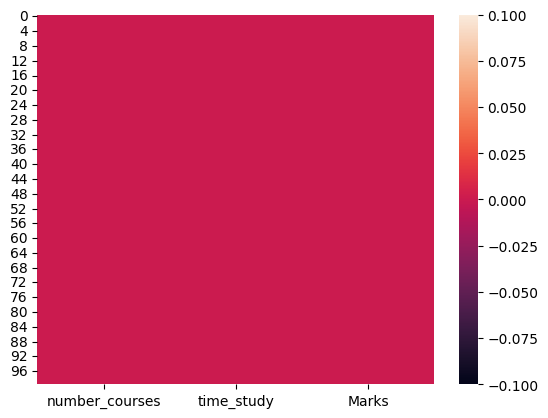

In [86]:
#cek missing data
sns.heatmap(df.isnull())

In [87]:
df.duplicated().sum()

0

<Axes: >

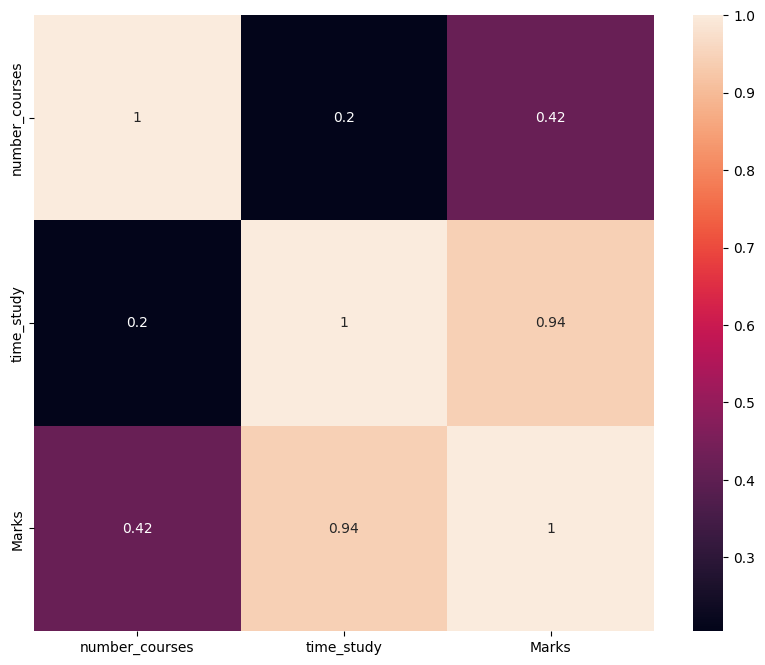

In [88]:
#korelasi data
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# DATA PREPARATION

In [89]:
#visualisasi mata pelajaran dengan nilai
figure = px.scatter(data_frame = df, x ="number_courses", y="Marks", size = "time_study", title = "Marks scored basis number of courses")
figure.show()

In [90]:
#visualisasi waktu belajar dengan nilai
figure = px.scatter(data_frame = df, x ="time_study", y="Marks", size = "number_courses", title = "Marks scored basis number of courses", trendline = "ols")
figure.show()

In [91]:
#visualisasi jumlah mata pelajaran
courses = df.groupby('number_courses').count()[['time_study']].sort_values(by='time_study',ascending=True).reset_index()
courses = courses.rename(columns={'time_study':'Total'})

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '8')])

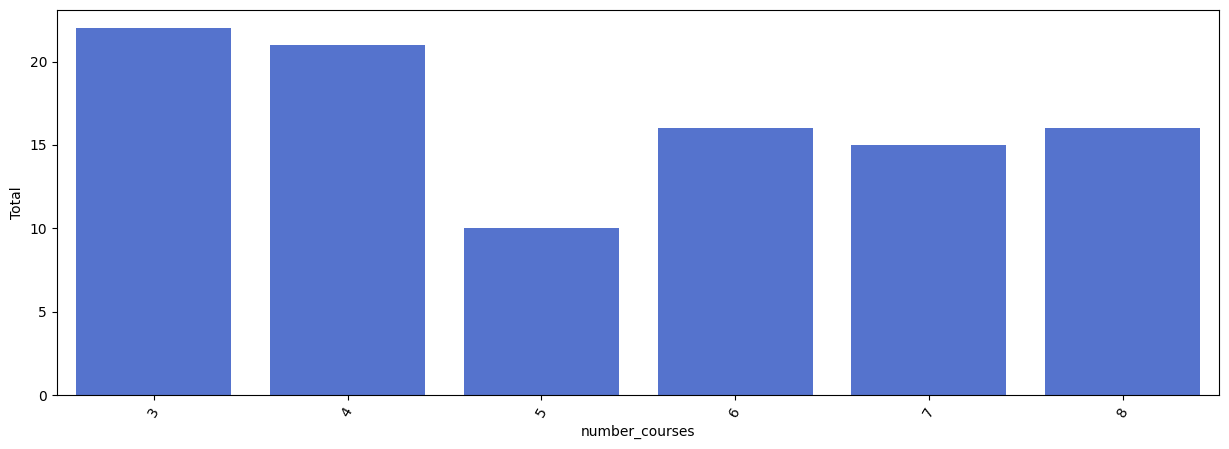

In [92]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=courses['number_courses'], y=courses['Total'], color='royalblue')
plt.xticks(rotation=60)

# MODELLING

In [93]:
#SELEKSI FITUR
features = ['number_courses', 'time_study']
x = df[features]
y = df['Marks']
x.shape, y.shape

((100, 2), (100,))

In [94]:
#SPLIT DATA TRAINING DAN DATA TESTING
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(25,)

In [95]:
#MEMBUAT MODEL REGRESI LINIER
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [96]:
#TESTING AKURASI MODEL
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score*100,"%")

akurasi model regresi linier =  95.08283547682976 %


# EVALUATION

In [97]:
#TESTING MODEL

#number_courses = 3
#time_study = 4
input_data = np.array([[3,4]]) # type: ignore

prediction = lr.predict(input_data)
print('Estimasi Nilai Siswa :', prediction)

Estimasi Nilai Siswa : [19.97229025]


c:\Users\lizap\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



# SAVE MODEL

In [98]:
import pickle

filename = 'estimasi_marks.sav'
pickle.dump(lr,open(filename,'wb'))